<a href="https://colab.research.google.com/github/RobLins12/Sistema-classificador-de-imagens/blob/main/CLASSIFICA%C3%87%C3%83O_IMAGENS_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Esse minicurso mostra como criar um classificador de imagens usando redes neurais convolucionais capaz de diferenciar gatos vs. cães usando tf.keras no Google Colab.

## Aqui, vamos cobrir:
- importação de dados
- pré-processamento
- criação do modelo
- treinamento
- avaliação
- predições

## Antes de começar, alterar o ambiente de execução para GPU

## 1. Importação das bibliotecas necessárias

In [ ]:
# operações com o sistema operacional
import os
import zipfile
import shutil
# biblioteca para download de arquivos
import gdown
# divisão treino/validação
from sklearn.model_selection import train_test_split
# biblioteca de deep learning
import tensorflow as tf
# para fazer o carregamento dos dados
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# tipos de camadas utilizadas para formar nosso modelo Keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
# vamos fazer um modelo sequencial, ex.: camada1 -> camada2 -> camada3 -> ...
from tensorflow.keras.models import Sequential
# biblioteca usada para operações matriciais
import numpy as np
# manipulação de imagens
from tensorflow.keras.preprocessing import image
# as próximas são para exibição de imagens
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## 2. Download e descompactação da base de dados

In [ ]:
url = 'https://drive.google.com/uc?id=1KDyPJ-hnkdoGC0wb1Qqfr2Xbvc_H53TL' #link da base no drive
output = 'dataset.zip'  # nome do arquivo baixado
gdown.download(url, output, quiet=False) # efetuar o download
!unzip -q dataset.zip # descompactar
!unzip -q train.zip # descompactar o arquivo de treino
!unzip -q test1.zip # descompactar o arquivo de teste
!mv test1 test # renomeando a pasta de teste

Downloading...
From: https://drive.google.com/uc?id=1KDyPJ-hnkdoGC0wb1Qqfr2Xbvc_H53TL
To: /content/dataset.zip
100%|██████████| 852M/852M [00:03<00:00, 266MB/s]


replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test1.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y
replace train.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y


## 3. Organização da base de dados - separação dos dados entre treino/validação

In [ ]:
# vamos aqui dividir o conjunto de treino em: treino/validação
# além disso, separar gatos e cachorros por pastas, ex.:
'''
|
|___train
|      |___cats
|      |___dogs
|
|___validation
|      |___cats
|      |___dogs
|
'''

dataset_home = './'
subdirs = ['train_set/', 'val_set/']

for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']

    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        os.makedirs(newdir, exist_ok=True)

where_is_data = 'train'
all_data = os.listdir(where_is_data)
train_data, val_data = train_test_split(all_data, test_size=0.2)

for dst_data, dst_set_name in zip([train_data, val_data], ['train_set/', 'val_set/']):
    for f_name in dst_data:
        if f_name.startswith('cat'):
            src = 'train/' + f_name
            dst = dst_set_name + 'cats/' + f_name
            os.rename(src, dst)

        elif f_name.startswith('dog'):
            src = 'train/' + f_name
            dst = dst_set_name + 'dogs/'  + f_name
            os.rename(src, dst)

## 4. Carregamento e pré-processamento das imagens

In [ ]:
# pré-processamento: normalização das imagens [0-255] --> [0-1]
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# carregamento das imagens de treino
train_generator = train_datagen.flow_from_directory(
    'train_set', # pasta de treino
    target_size=(150, 150), # redimensionamento da imagem
    batch_size=32,
    class_mode='binary' #tipo de classificação
)

# carregamento das imagens de validação
validation_generator = validation_datagen.flow_from_directory(
    'val_set',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 24020 images belonging to 2 classes.
Found 9020 images belonging to 2 classes.


## 5. Definição do modelo de deep learning

In [ ]:
model = Sequential([
    Input(shape=(150, 150, 3)), # camada de entrada contém a info do tamanho da imagem
    Conv2D(32, (3, 3)), # camada convolucional
    MaxPooling2D((2,2)), #camada de pooling
    Conv2D(64, (3, 3)), # camada convolucional
    MaxPooling2D((2,2)), #camada de pooling
    Flatten(), # vetorização
    Dense(512, activation='relu'), # dense: camadas totalmente conectadas
    Dense(1, activation='sigmoid')
])

# inicialização do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 6. Treinamento do modelo de deep learning

In [ ]:
history = model.fit(
    train_generator, # dados de treino
    epochs=5,
    validation_data=validation_generator # dados de validação
)

Epoch 1/5
751/751 [==============================] - 118s 141ms/step - loss: 0.7242 - accuracy: 0.6733 - val_loss: 0.5113 - val_accuracy: 0.7578
Epoch 2/5
751/751 [==============================] - 117s 156ms/step - loss: 0.4979 - accuracy: 0.7574 - val_loss: 0.4453 - val_accuracy: 0.7900
Epoch 3/5
751/751 [==============================] - 102s 136ms/step - loss: 0.4120 - accuracy: 0.8131 - val_loss: 0.3209 - val_accuracy: 0.8666
Epoch 4/5
751/751 [==============================] - 101s 134ms/step - loss: 0.2895 - accuracy: 0.8754 - val_loss: 0.2319 - val_accuracy: 0.9295
Epoch 5/5
751/751 [==============================] - 102s 136ms/step - loss: 0.1677 - accuracy: 0.9368 - val_loss: 0.1610 - val_accuracy: 0.9496


## 7. Avaliação do modelo que foi treinado

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print("Accuracy: ", accuracy)

282/282 [==============================] - 26s 93ms/step - loss: 0.1610 - accuracy: 0.9496
Accuracy:  0.9495565295219421


## 8. Realizar predições e visualizá-las

In [ ]:
# abrir uma imagem individual, fazer redimensionamento, normalização...
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    return img_array, img

# prever a classe da imagem pré-processada utilizando o modelo treinado
# exibir a classe predita
def display_prediction(img_path, model):
    img_array, img = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)

    plt.imshow(img)
    plt.axis('off')

    if prediction < 0.5:
        plt.title("Prediction: Cat (%.2f%%)" % (100 - prediction[0][0] * 100))
    else:
        plt.title("Prediction: Dog (%.2f%%)" % (prediction[0][0] * 100))

    plt.show()

1/1 [==============================] - 0s 179ms/step


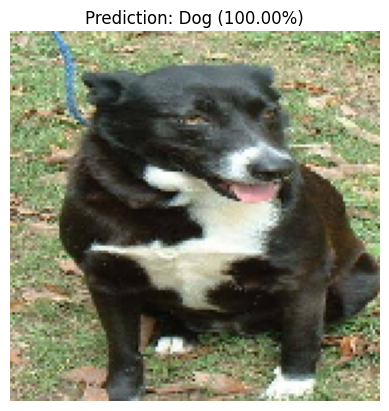

1/1 [==============================] - 0s 26ms/step


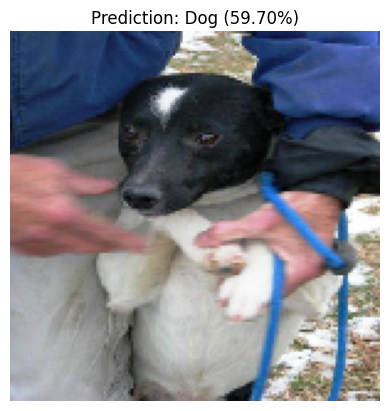

1/1 [==============================] - 0s 19ms/step


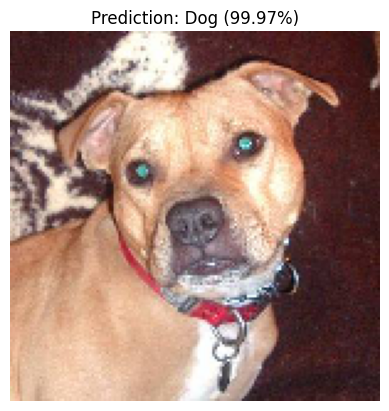

1/1 [==============================] - 0s 20ms/step


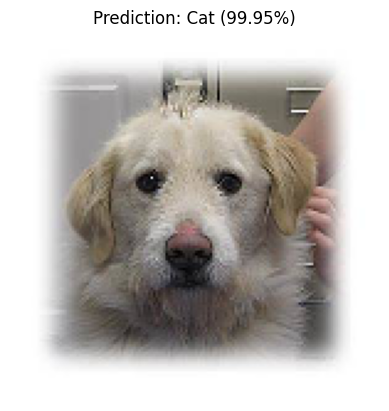

1/1 [==============================] - 0s 19ms/step


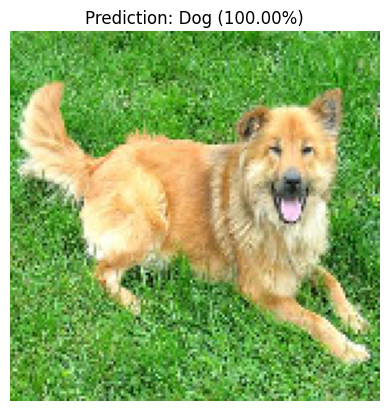

1/1 [==============================] - 0s 26ms/step


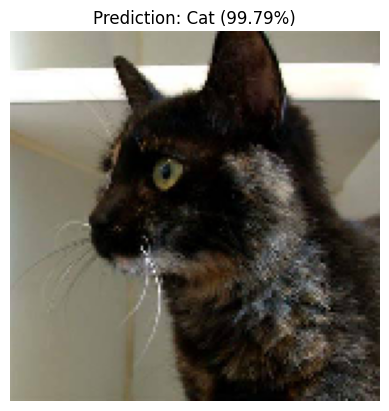

1/1 [==============================] - 0s 19ms/step


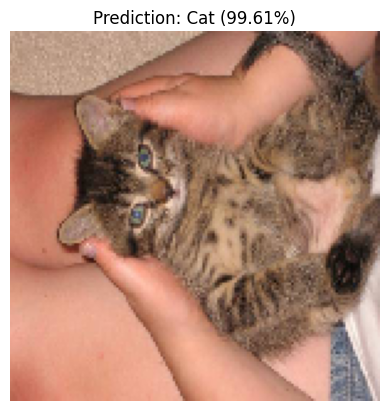

1/1 [==============================] - 0s 25ms/step


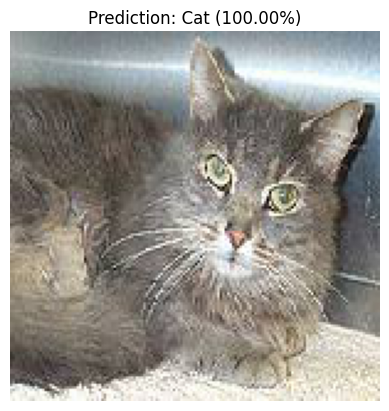

1/1 [==============================] - 0s 25ms/step


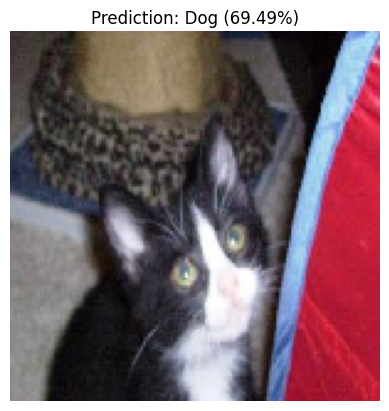

1/1 [==============================] - 0s 22ms/step


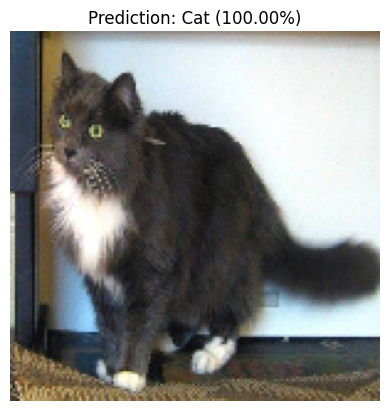

In [ ]:
for i in range(10):
  if i == 0:
    i = 1000
  img_path = 'test/' + str(i) + '.jpg'
  display_prediction(img_path, model)

